# Worked Problems for Assessment, Computer Infrastructure Module  
Autumn 2025, Atlantic Technological University  
Author: Susan Collins  

## Problem 1: Data from yfinance  
Brief:
```
Using the yfinance Python package, write a function called get_data() that downloads all hourly data for the previous five days for the five FAANG stocks:

    Facebook (META)
    Apple (AAPL)
    Amazon (AMZN)
    Netflix (NFLX)
    Google (GOOG)

The function should save the data into a folder called data in the root of your repository using a filename with the format YYYYMMDD-HHmmss.csv where YYYYMMDD is the four-digit year (e.g. 2025), followed by the two-digit month (e.g. 09 for September), followed by the two digit day, and HHmmss is hour, minutes, seconds. Create the data folder if you don't already have one.


### Importing libraries

In [1]:
# import NumPy to manipulate numerical arrays
import numpy as np
# import Python Data Analysis Library
import pandas as pd
# import Matplotlib.PyPlot for plotting
import matplotlib.pyplot as plt
import seaborn as sns
# import yfinance for financial data for these exercises
# https://github.com/ranaroussi/yfinance
import yfinance as yf
# Library for handling date and time data, https://docs.python.org/3/library/datetime.html
import datetime as dt
# Library for interfacing with the operating system, https://docs.python.org/3/library/os.html
import os 
# Library for regular expressions, used for string matching
import re


### Downloading financial data  
The [yfinance documentation](https://ranaroussi.github.io/yfinance/) front page
contains a Quick Start guide.  
The [`yfinance.download`](https://ranaroussi.github.io/yfinance/reference/api/yfinance.download.html) function creates a Pandas DataFrame. 


_Note:  The call to `yfinance.download` produced a FutureWarning to alert users 
that the default value of the `auto_adjust` argument has changed. Should I
suppress this warning or look further into the uses of this argument?  
This [StackOverflow answer](https://stackoverflow.com/a/37453925) says that the auto_adjust parameter will adjust the historical stock prices for splits and dividends, so that long-term comparisons of stick prices can be made. As we are looking at prices over the span of 5 days, this parameter is very unlikely to have any effect on this analysis; but if I call it with its default value of True, it does suppress the annoying warning._

In [2]:
# Testing the yfinance.download function with a multiple stock tickers
download_data = yf.download(['META','AAPL','AMZN','NFLX','GOOG'], period='5d', interval='1h', auto_adjust=True)

# Look at the resulting DataFrame.
#print(download_data.columns)
print(download_data.shape)
print(download_data.dtypes)
#download_data

[*********************100%***********************]  5 of 5 completed


(34, 25)
Price   Ticker
Close   AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
High    AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Low     AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Open    AAPL      float64
        AMZN      float64
        GOOG      float64
        META      float64
        NFLX      float64
Volume  AAPL        int64
        AMZN        int64
        GOOG        int64
        META        int64
        NFLX        int64
dtype: object


### Creating output filename and output directory

In [3]:
# Current date and time.
now = dt.datetime.now()

# Show.
print(f"Now is {now}.")

# Use datetime.datetime.strftime to create the output filename as a string, 
# in the requested format.  
# Handy cheat sheet for strftime format specifiers available at
# https://strftime.org/ 
data_output_filename = now.strftime("%Y%m%d-%H%M%S.csv")
print(f"Output filename is {data_output_filename}.")

Now is 2025-12-18 20:08:47.191430.
Output filename is 20251218-200847.csv.


In [4]:
# Set the directory for the output CSV files.
data_output_dir = "data/"

# Check if this directory exists
# (adapted from https://stackoverflow.com/a/1274436)
if not os.path.isdir(data_output_dir):
    os.makedirs(data_output_dir)
    print(f"Created data directory at {data_output_dir}")
else:
    print(f"Data directory exists at {data_output_dir}")


Data directory exists at data/


### Writing financial data to CSV file  
Pandas has a function [`pandas.DataFrame.to_csv`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) to write to CSV files.

In [5]:
# Write DataFrame to a test CSV file in data directory.
download_data.to_csv(data_output_dir + data_output_filename)

## Problem 2: Plotting Data  
Brief:  
```
Write a function called plot_data() that opens the latest data file in the data folder and, on one plot, plots the Close prices for each of the five stocks. The plot should include axis labels, a legend, and the date as a title. The function should save the plot into a plots folder in the root of your repository using a filename in the format YYYYMMDD-HHmmss.png. Create the plots folder if you don't already have one.


### Checking for the read-in  data directory  

This section of code may be run independently of the previous section, so we must  
check again that the data directory exists and that an appropriate CSV file is 
available.

In [6]:
# Set the directory from which to read CSV files.
data_read_dir = "data/"

# Check if this directory exists
# (adapted from https://stackoverflow.com/a/1274436)
if not os.path.isdir(data_read_dir):
    print(f"Data directory {data_read_dir} does not exist!")
else:
    print(f"Found data directory at {data_read_dir}")

Found data directory at data/


### Checking the read-in data directory for the latest CSV file  
Approach: 
- List the files in the data directory
- Find those with appropriate filenames
- Sort them by name (which should be the file creation time)
- Get the name of the newest file

In [7]:
# List the files in the data_read directory
data_files = os.listdir(data_read_dir)

data_files

['20251218-020124.csv',
 '9999.csv',
 'testfile.csv',
 'testfile.foo',
 '20251218-200238.csv',
 '20251218-012357.csv',
 '12345.csv',
 '20251218-200847.csv',
 '20251218-003922.csv',
 '12345678-123456.foo',
 '20251218-014316.csv']

In [8]:
# Filter out the files that match the expected data filename format,
# i.e. YYYYMMDD-HHmmss.csv 
# (adapted from https://stackoverflow.com/a/56223939) 
# regex reference: https://www.w3schools.com/python/python_regex.asp

# Search pattern to match valid data files
search_pattern = r'[0-9]{8}[-][0-9]{6}\.csv$'
# Empty list to hold matching filenames
data_files_filtered = []

# Iterate through the files in the data_read directory and get the ones with 
# filenames matching the pattern 
for file in data_files:
    if re.match(search_pattern, file):
        data_files_filtered.append(file)

# Show filtered data files
data_files_filtered

['20251218-020124.csv',
 '20251218-200238.csv',
 '20251218-012357.csv',
 '20251218-200847.csv',
 '20251218-003922.csv',
 '20251218-014316.csv']

In [9]:
# Sort the filtered data files to get the latest one
data_read_filename = sorted(data_files_filtered, reverse=True)[0]

# Show the final data filename
data_read_filename

'20251218-200847.csv'

### Reading in from the CSV file

In [10]:
# Reading DataFrame from CSV file using pandas.read_csv()
# (Ref: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).
# Parameters:
# header=[0,1] - The first two rows of the CSV file contain MultiIndex header information,
# index_col=0 - I want column 0, the dates, to be the index of the resulting DataFrame,
# parse_dates=[0] - I want the index values to be parsed as dates (i.e. as datetime objects.)
# (adapted from https://stackoverflow.com/a/37453925)
plot_data = pd.read_csv(data_read_dir + data_read_filename, header=[0,1], index_col=0, parse_dates=[0])

# Look at first few rows of resulting DataFrame
#print(plot_data.columns)
#print(plot_data.shape)
#print(plot_data.index)
#print(plot_data.dtypes)

plot_data.head()

Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-12-12 14:30:00+00:00  277.869995  226.380005  309.589996  644.010010   
2025-12-12 15:30:00+00:00  277.739990  226.020004  308.000000  641.469971   
2025-12-12 16:30:00+00:00  277.855011  226.330002  309.570007  643.219971   
2025-12-12 17:30:00+00:00  279.049988  226.990005  311.649994  647.500122   
2025-12-12 18:30:00+00:00  277.950012  226.850006  310.962799  645.309998   

Price                                       High                          \
Ticker                          NFLX        AAPL        AMZN        GOOG   
Datetime                                                                   
2025-12-12 14:30:00+00:00  95.540001  279.220001  230.080002  316.130005   
2025-12-12 15:30:00+00:00  95.154999  278.859985  227.610001  310.940002   
2025-12-12 16:30:00+00:00  95.154999  278.440002  226.699997  310.779999   
2025-12-12 17:30:00+00:00  95.440002  279.190002  227.139801  311.690002   
2025-12-12 18:30:00+00:00  95.555000  279.049988  227.375000  311.890015   

Price                                             ...        Open              \
Ticker                           META       NFLX  ...        AAPL        AMZN   
Datetime                                          ...                           
2025-12-12 14:30:00+00:00  652.010010  96.919998  ...  277.795013  230.020004   
2025-12-12 15:30:00+00:00  647.200012  96.070000  ...  277.880005  226.360001   
2025-12-12 16:30:00+00:00  643.822327  95.419998  ...  277.769989  226.000000   
2025-12-12 17:30:00+00:00  648.500000  95.559998  ...  277.834991  226.320007   
2025-12-12 18:30:00+00:00  648.500000  95.790001  ...  279.040009  226.990005   

Price                                                          Volume  \
Ticker                           GOOG        META       NFLX     AAPL   
Datetime                                                                
2025-12-12 14:30:00+00:00  314.809998  650.210022  95.504997  3907328   
2025-12-12 15:30:00+00:00  309.609985  643.929993  95.542000  3485545   
2025-12-12 16:30:00+00:00  308.000000  641.369995  95.154999  2096132   
2025-12-12 17:30:00+00:00  309.570007  643.369995  95.155602  2564725   
2025-12-12 18:30:00+00:00  311.649994  647.679993  95.445000  2354465   

Price                                                           
Ticker                        AMZN     GOOG     META      NFLX  
Datetime                                                        
2025-12-12 14:30:00+00:00  6052796  3133641  1868580  11663856  
2025-12-12 15:30:00+00:00  3720416  2344376  1448891   3629040  
2025-12-12 16:30:00+00:00  2582048  1633867  1057779   2672382  
2025-12-12 17:30:00+00:00  1740300  1082515   872664   1950927  
2025-12-12 18:30:00+00:00  1616710   809271   604159  10145800  

[5 rows x 25 columns]

### Sanity checking: compare downloaded and read DataFrames  
For the purposes of this notebook, we can compare the downloaded DataFrame to 
the DataFrame read in from the CSV file. This will tell us if the file has been 
exported and read back in accurately.

The [`pandas.DataFrame.compare`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.compare.html) 
function lets us compare two DataFrames and returns another DataFrame showing 
non-matching values (and Nan where the values are a match.)


In [11]:
# Comparing the downloaded and read-from-file DataFrames.
plot_data.compare(download_data).head()

Price                     Close                                           \
Ticker                     AAPL              AMZN                   NFLX   
                           self other        self       other       self   
Datetime                                                                   
2025-12-12 14:30:00+00:00   NaN   NaN         NaN         NaN        NaN   
2025-12-12 15:30:00+00:00   NaN   NaN  226.020004  226.020004        NaN   
2025-12-12 16:30:00+00:00   NaN   NaN         NaN         NaN        NaN   
2025-12-12 17:30:00+00:00   NaN   NaN  226.990005  226.990005  95.440002   
2025-12-12 18:30:00+00:00   NaN   NaN  226.850006  226.850006        NaN   

Price                                High                                ...  \
Ticker                               AAPL              AMZN              ...   
                               other self other        self       other  ...   
Datetime                                                                 ...   
2025-12-12 14:30:00+00:00        NaN  NaN   NaN         NaN         NaN  ...   
2025-12-12 15:30:00+00:00        NaN  NaN   NaN  227.610001  227.610001  ...   
2025-12-12 16:30:00+00:00        NaN  NaN   NaN         NaN         NaN  ...   
2025-12-12 17:30:00+00:00  95.440002  NaN   NaN  227.139801  227.139801  ...   
2025-12-12 18:30:00+00:00        NaN  NaN   NaN         NaN         NaN  ...   

Price                            Low            Open                    \
Ticker                          NFLX            AAPL              AMZN   
                                self      other self other        self   
Datetime                                                                 
2025-12-12 14:30:00+00:00  95.050003  95.050003  NaN   NaN  230.020004   
2025-12-12 15:30:00+00:00        NaN        NaN  NaN   NaN  226.360001   
2025-12-12 16:30:00+00:00        NaN        NaN  NaN   NaN         NaN   
2025-12-12 17:30:00+00:00        NaN        NaN  NaN   NaN         NaN   
2025-12-12 18:30:00+00:00        NaN        NaN  NaN   NaN  226.990005   

Price                                                                     \
Ticker                                       GOOG                   NFLX   
                                other        self       other       self   
Datetime                                                                   
2025-12-12 14:30:00+00:00  230.020004  314.809998  314.809998  95.504997   
2025-12-12 15:30:00+00:00  226.360001         NaN         NaN  95.542000   
2025-12-12 16:30:00+00:00         NaN         NaN         NaN        NaN   
2025-12-12 17:30:00+00:00         NaN         NaN         NaN        NaN   
2025-12-12 18:30:00+00:00  226.990005         NaN         NaN        NaN   

Price                                 
Ticker                                
                               other  
Datetime                              
2025-12-12 14:30:00+00:00  95.504997  
2025-12-12 15:30:00+00:00  95.542000  
2025-12-12 16:30:00+00:00        NaN  
2025-12-12 17:30:00+00:00        NaN  
2025-12-12 18:30:00+00:00        NaN  

[5 rows x 30 columns]

The `pandas.DataFrame.compare` function is showing many values as not identical, 
although they appear to be, due to the limited precision of floating-point 
representation in Python (e.g. [this article](https://www.geeksforgeeks.org/python/comparing-floating-points-number-for-almost-equality-in-python/).) 

Instead, we can use the `numpy.isclose()` function which can compare values with 
a small default tolerance level. (Suggested by [this StackOverflow answer](https://stackoverflow.com/a/33549675).)

In [12]:
# Sanity check.
# Compare the downloaded data to the data read from CSV, and show the first
# three rows of results 
print(np.isclose(download_data,plot_data)[0:2,])

# Check if all the vales in the array of results are True,
# (adapted from https://stackoverflow.com/a/55834412 and 
# https://numpy.org/devdocs/reference/generated/numpy.ndarray.all.html#numpy.ndarray.all) 
df_comparison_result = np.isclose(download_data,plot_data).all()

print(f"Are all values in the np.isclose result array True? {df_comparison_result}")

[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]
 [ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True]]
Are all values in the np.isclose result array True? True


### Preparing the plot output directory  
As before, we must check that the plot output directory exists, or create it.

In [13]:
# Setting the plot output directory
plot_dir = "plots/"

# Check if this directory exists
# (adapted from https://stackoverflow.com/a/1274436)
if not os.path.isdir(plot_dir):
    os.makedirs(plot_dir)
    print(f"Created plot output directory at {plot_dir}")
else:
    print(f"Plot output directory exists at {plot_dir}")


# Creating the name of the plot output file, from the data read file 
# minus its extension
plot_output_filename = data_read_filename[:-4]+".png"

# Show the plot output filename
plot_output_filename


Plot output directory exists at plots/


'20251218-200847.png'

### Plotting the data  
Pandas has its own DataFrame plot function, [`Pandas.DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html), that calls Matplotlib.  
The stock market data here shows large gaps, which correspond to times when the 
markets are closed. It is the convention for stock prices to be plotted so that 
we skip over these closed times. Will replot following the example in this 
[answer](https://stackoverflow.com/a/65836503) to a StackOverflow question, 
"Matplotlib: How to skip a range of hours when plotting with a datetime axis?"

<Axes: xlabel='Datetime'>

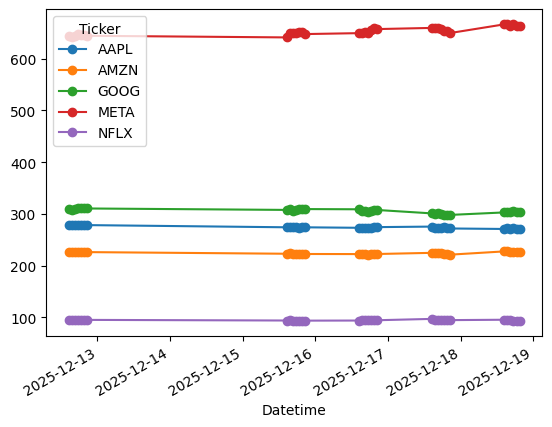

In [14]:
# plot the close prices in the DataFrame with markers for datapoints
plot_data["Close"].plot(marker="o")

The stock market data here shows large interpolated gaps, which correspond to times when the 
markets are closed. It is the convention for stock prices to be plotted so that 
we skip over these closed times. Will replot following the example in this 
[answer](https://stackoverflow.com/a/65836503) to a StackOverflow question, 
"Matplotlib: How to skip a range of hours when plotting with a datetime axis?"

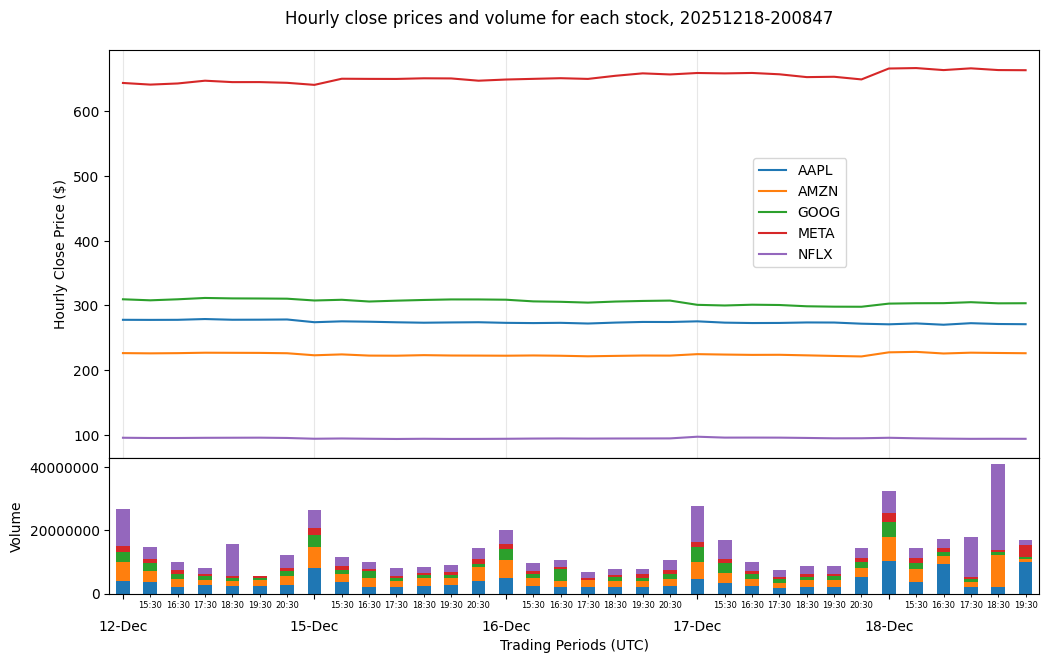

In [ ]:
# Create figure and matplotlib plots with some additional formatting
fig, (top, bot) = plt.subplots(2, 1, sharex=True, figsize=(12,8),
                        gridspec_kw=dict(height_ratios=[0.75,0.25]))

# remove vertical space between subplots
fig.subplots_adjust(hspace=0)

# plot Close prices and Volume on separate subplots. 
# Close prices are plotted without using the datetimes in the data index, i.e. 
# the periods are plotted all in sequence. 
# Volume is a stacked bar plot. 
plot_data["Close"].plot(ax=top, use_index=False)
plot_data["Volume"].plot(ax=bot, kind='bar', stacked=True, legend=None)

# set plot title including the timestamp in the name of the read CSV file
plt.suptitle("Hourly close prices and volume for each stock, " + data_read_filename[:-4], y=0.93)
# set labels for x-axis and both y-axes
bot.set_xlabel("Trading Periods (UTC)")
bot.set_ylabel("Volume")
top.set_ylabel("Hourly Close Price ($)")

# Set fixed major and minor x-tick locations. 
# Major tick is the start of each trading day at 14:30 UTC. 
# Minor tick is every other hourly datapoint/  
ticks_date = plot_data.index.indexer_at_time('14:30')
ticks_time = np.arange(plot_data.index.size) # step in hours
top.set_xticks(ticks_date)
top.set_xticks(ticks_time, minor=True)

# add vertical gridlines at the start of each day
top.grid(axis='x', alpha=0.3)

# set legend location
top.legend(loc='center right', bbox_to_anchor=(0.8, 0.6))

# Format major and minor tick labels
bot.ticklabel_format(axis="y", style="plain")
bot.tick_params(axis='x', which='minor', labelsize=6, rotation=90)
labels_date = [maj_tick.strftime('\n%d-%b').replace('\n0', '\n')
                for maj_tick in plot_data.index[ticks_date]]
labels_time = [min_tick.strftime('%H:%M')
                for min_tick in plot_data.index[ticks_time]]
top.set_xticklabels(labels_date)
top.set_xticklabels(labels_time, minor=True)
top.figure.autofmt_xdate(rotation=0, ha='center', which='both')

# Save plot to file
plt.savefig(plot_dir + plot_output_filename)

## End